In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

In [4]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [13]:
model = Sequential()


In [14]:
# build a LSTM RNN
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))

D:\PY\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(stateful=True, batch_input_shape=(50, 20, 1..., units=20, return_sequences=True)`


In [15]:
# add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

Training ------------


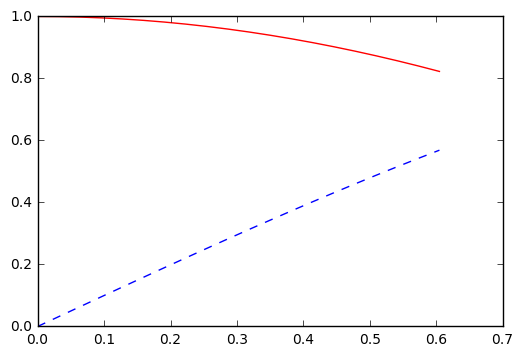

InternalError: Blas GEMM launch failed : a.shape=(1000, 1), b.shape=(1, 20), m=1000, n=20, k=1
	 [[Node: lstm_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](lstm_1/Reshape, lstm_1/strided_slice)]]
	 [[Node: loss/mul/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2118_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'lstm_1/MatMul', defined at:
  File "D:\PY\Anaconda3\Lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\PY\Anaconda3\Lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "D:\PY\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "D:\PY\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "D:\PY\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "D:\PY\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\PY\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\PY\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\PY\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\PY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\PY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-d34598e4b1c7>", line 6, in <module>
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
  File "D:\PY\Anaconda3\lib\site-packages\keras\models.py", line 442, in add
    layer(x)
  File "D:\PY\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 268, in __call__
    return super(Recurrent, self).__call__(inputs, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\keras\engine\topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "D:\PY\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 340, in call
    preprocessed_input = self.preprocess_input(inputs, training=None)
  File "D:\PY\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 1084, in preprocess_input
    timesteps, training=training)
  File "D:\PY\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 50, in _time_distributed_dense
    x = K.dot(x, w)
  File "D:\PY\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 998, in dot
    out = tf.matmul(x, y)
  File "D:\PY\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1816, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "D:\PY\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1217, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "D:\PY\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "D:\PY\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\PY\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(1000, 1), b.shape=(1, 20), m=1000, n=20, k=1
	 [[Node: lstm_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](lstm_1/Reshape, lstm_1/strided_slice)]]
	 [[Node: loss/mul/_47 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2118_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [16]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)